# First Task Curzi Ilaria and Georgia Zavou
# Meetups in dublin (2018)

## 1. Network Description and Main Characteristics

The dataset analyzed in this project represents the social structure of Meetup events held in Dublin during 2018.
The data were collected via the official Meetup.com API, which provides information about events and their participants.

The original network is a bipartite graph where:
- One set of nodes represents individual participants.
- The other set of nodes represents meetup events.

To study the relationships between events, the bipartite network was projected onto a one-mode network of meetup events, where:

- Nodes = Meetup events.
- Edges = Weighted connections representing shared participants between two events.
- The weight of each edge is the normalized number of common members between the connected meetups.

The resulting network is:
- Undirected: sharing members is symmetric.
- Weighted: edges carry a weight based on the strength of the connection (number of shared participants, normalized).

| Feature                  | Description                                  |
|--------------------------|----------------------------------------------|
| *Number of nodes*       | 1481 meetup events                          |
| *Number of edges*       | 708,163 weighted edges                      |
| *Edge weight meaning*   | Normalized number of shared participants    |
| *Graph type*            | Undirected, weighted, one-mode projection   |

This network represents social affinity between meetup groups in Dublin, based on overlapping membership. Such structures can reveal important patterns of connectivity between communities of interest, co-participation behaviors, and hubs that link different thematic areas.

# 2. Network Analysis

## 2.1 Microscale Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Path to your edge list file inside Google Drive
network_path = "/content/drive/MyDrive/meetup-normalised-comembership.edges"

In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Function to read the weighted edge list
def read_weighted_edgelist(in_path):
    g = nx.Graph()
    with open(in_path, "r") as fin:
        for line in fin:
            node1, node2, weight = line.strip().split(" ")
            g.add_edge(int(node1), int(node2), weight=float(weight))
    return g

# Load the graph from your Drive path
G = read_weighted_edgelist(network_path)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Calculate network density
density = nx.density(G)
print(f"Network density: {density:.4f}")

Number of nodes: 1481
Number of edges: 708163
Network density: 0.6462


The initial density of 0.6462 suggests that around 64.6% of all possible connections between meetups exist. However, this value is artificially inflated because even a single shared participant creates a link between two meetups. This highlights the need to carefully analyze the edge weights to filter out weak connections and focus on the most meaningful relationships within the network.

### Edge weights

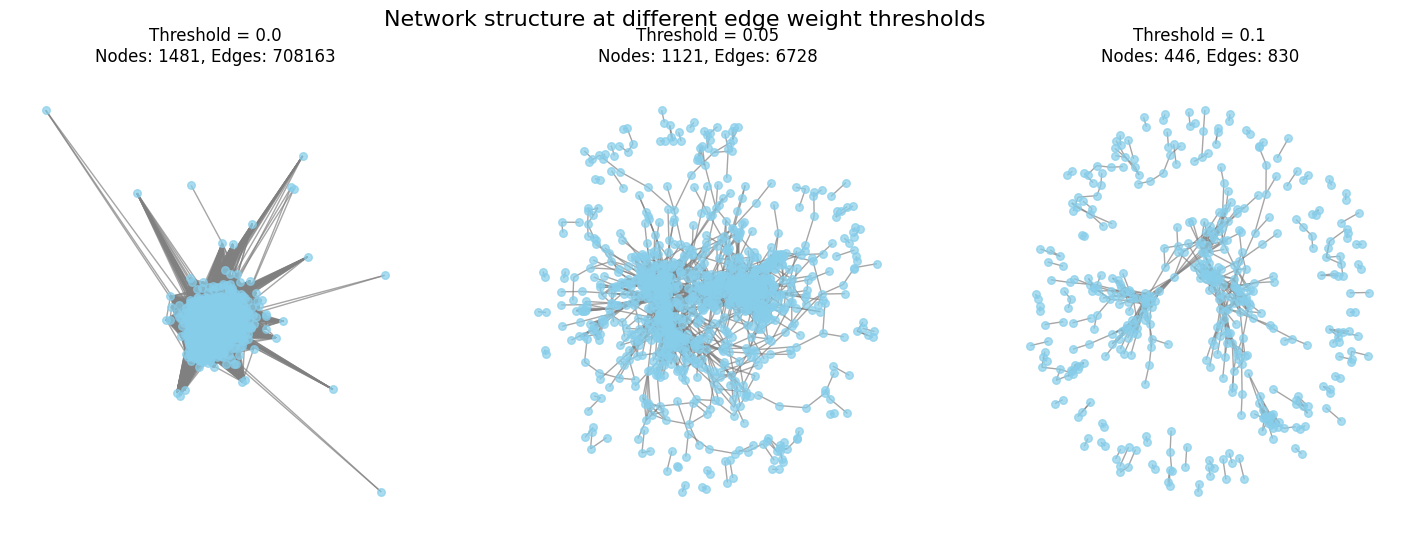

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

# Define thresholds you want to compare
thresholds = [0.00, 0.05, 0.1]

# Set up the plot
plt.figure(figsize=(18, 6))

# Iterate through each threshold and plot the filtered network
for i, threshold in enumerate(thresholds):
    # Filter the edges by weight threshold
    G_filtered = nx.Graph(
        (u, v, d) for u, v, d in G.edges(data=True) if d["weight"] > threshold
    )

    # Compute layout (keep seed fixed for comparison)
    pos = nx.spring_layout(G_filtered, seed=42)

    # Create subplot
    plt.subplot(1, len(thresholds), i + 1)
    nx.draw(G_filtered, pos,
            node_color='skyblue',
            node_size=30,
            edge_color='gray',
            with_labels=False,
            alpha=0.7)

    plt.title(f"Threshold = {threshold}\nNodes: {G_filtered.number_of_nodes()}, Edges: {G_filtered.number_of_edges()}")
    plt.axis('off')

plt.suptitle("Network structure at different edge weight thresholds", fontsize=16)
plt.show()


The figure shows how the structure of the meetup network changes as we increase the edge weight threshold.

With no filtering (threshold = 0), the network appears almost fully connected because a link is created even when just one person participates in both meetups. This results in an extremely dense graph, where meaningful patterns are hard to detect.

At threshold = 0.05, weaker connections are removed by keeping only the edges where at least 5% of the participants attend both meetups. This means that a link between two meetup groups is considered strong enough to be included in the network only if a significant portion of people actively participates in both events. By applying this filter, we avoid connections based on random or very weak overlaps (like just one shared participant), and we focus on stronger, more meaningful relationships between meetups.

At threshold = 0.1, too many edges are discarded, and the network becomes fragmented, losing important structural information.

For these reasons, the threshold of 0.05 was chosen for the following analyses, as it provides a good balance between filtering out noise and preserving the meaningful structure of the network.

However, the network will also be analyzed without filtering (threshold = 0) to offer a complete overview and allow for comparison between the two approaches

In [106]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Function to read the weighted edge list
def read_weighted_edgelist(in_path):
    g = nx.Graph()
    with open(in_path, "r") as fin:
        for line in fin:
            node1, node2, weight = line.strip().split(" ")
            g.add_edge(int(node1), int(node2), weight=float(weight))
    return g

# Load the graph from your Drive path
G = read_weighted_edgelist(network_path)

# Filter the graph by edge weight (threshold = 0.05)
weight_threshold = 0.05
G_filtered = nx.Graph(
    (u, v, d) for u, v, d in G.edges(data=True) if d["weight"] > weight_threshold
)

# Basic information about the filtered graph
print(f"Number of nodes (filtered): {G_filtered.number_of_nodes()}")
print(f"Number of edges (filtered): {G_filtered.number_of_edges()}")

# Calculate network density for the filtered graph
density_filtered = nx.density(G_filtered)
print(f"Network density (filtered): {density_filtered:.4f}")


Number of nodes (filtered): 1121
Number of edges (filtered): 6728
Network density (filtered): 0.0107


After applying the weight threshold of 0.05, the network becomes much sparser. The number of nodes decreases from 1481 to 1121, and the number of edges drops dramatically from over 700,000 to just 6,728. The network density also falls from 0.6462 to 0.0107. This means that only the strongest connections between events (those sharing a higher percentage of participants) are kept, removing many weak links that were making the network look highly connected before.

Edge Weight Statistics:
count    708163.000000
mean          0.007690
std           0.010354
min           0.000047
25%           0.002224
50%           0.004525
75%           0.009132
max           1.000000
dtype: float64


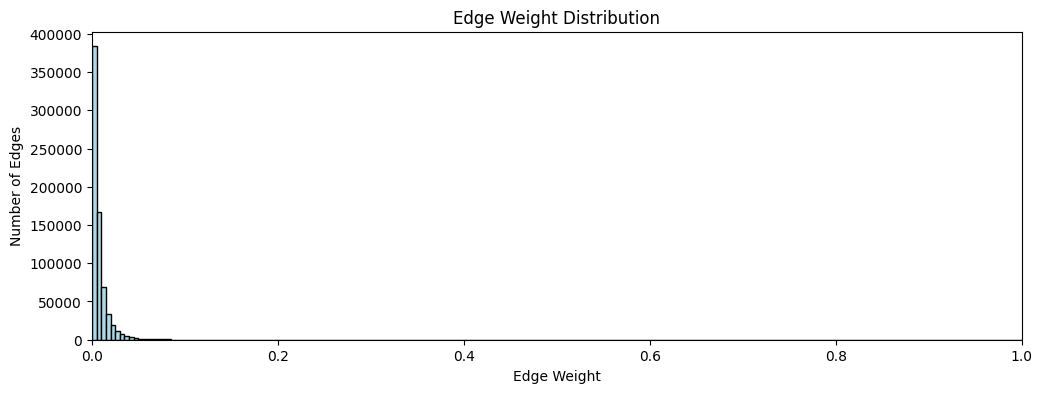

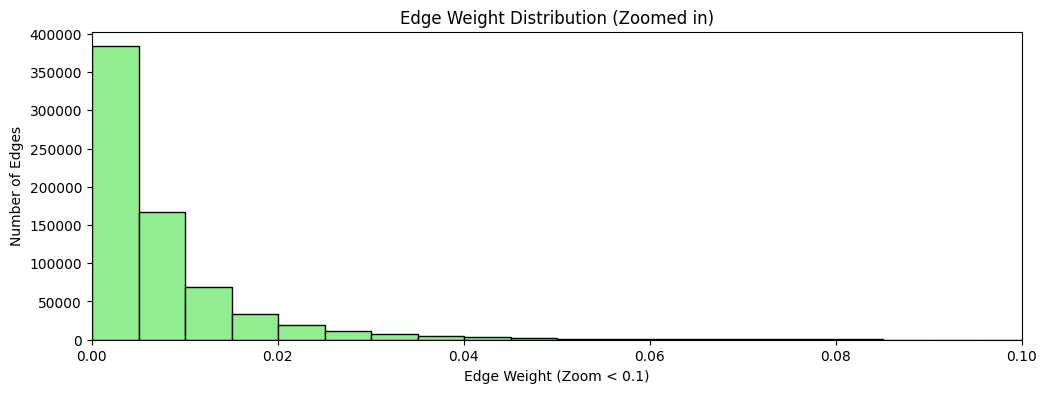

In [ ]:
# Extract edge weights
weights = [data["weight"] for _, _, data in G.edges(data=True)]
weights_series = pd.Series(weights)

# Descriptive statistics of edge weights
print("Edge Weight Statistics:")
print(weights_series.describe())

# Plot the full edge weight distribution (linear scale)
plt.figure(figsize=(12, 4))
weights_series.hist(grid=False, bins=200, color='lightblue', edgecolor='black')
plt.xlim((0, 1))
plt.ylabel("Number of Edges")
plt.xlabel("Edge Weight")
plt.title("Edge Weight Distribution")
plt.show()

# Zoom on small edge weights (e.g., weights < 0.1)
plt.figure(figsize=(12, 4))
weights_series.hist(grid=False, bins=200, color='lightgreen', edgecolor='black')
plt.xlim((0, 0.1))
plt.ylabel("Number of Edges")
plt.xlabel("Edge Weight (Zoom < 0.1)")
plt.title("Edge Weight Distribution (Zoomed in)")
plt.show()

Without filtering, the edge weight distribution is strongly skewed towards very low values, meaning that many connections exist even when only one or very few participants are shared.

Edge Weight Statistics (Filtered Graph):
count    6728.000000
mean        0.073946
std         0.030333
min         0.050011
25%         0.055768
50%         0.064661
75%         0.081411
max         1.000000
dtype: float64


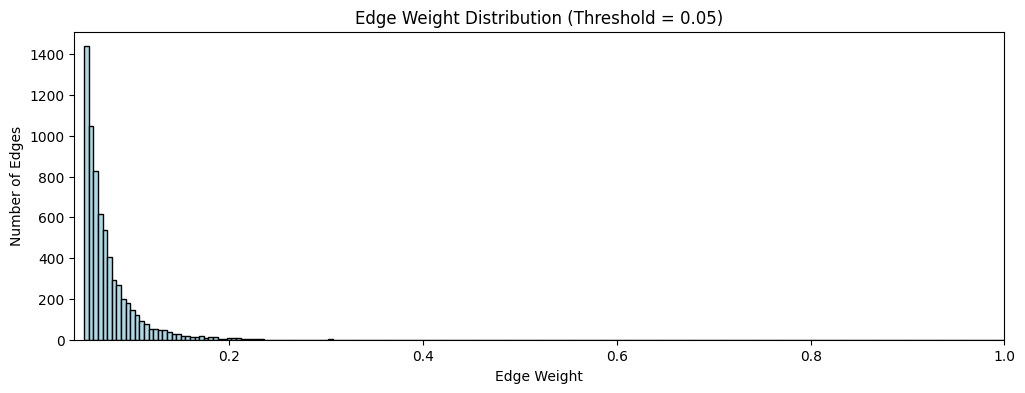

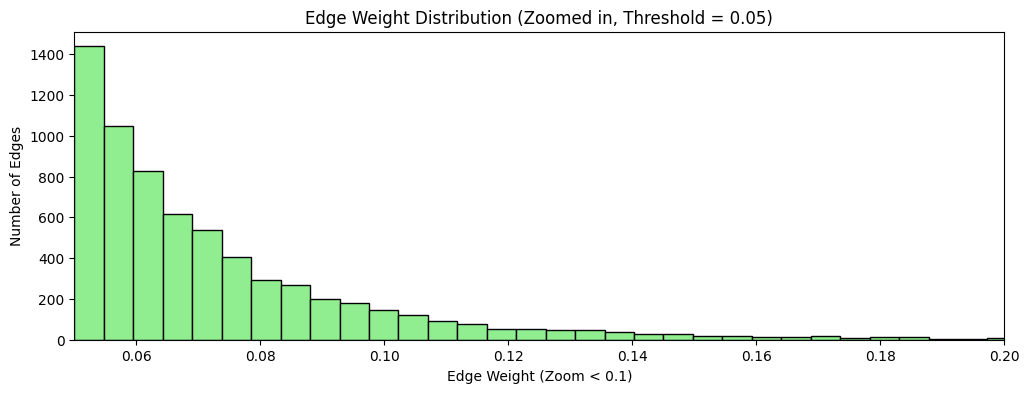

In [91]:
# Edge weight distribution analysis after filtering (threshold = 0.05)

# Extract edge weights from the filtered graph
weights = [data["weight"] for _, _, data in G_filtered.edges(data=True)]
weights_series = pd.Series(weights)

# Descriptive statistics of edge weights
print("Edge Weight Statistics (Filtered Graph):")
print(weights_series.describe())

# Plot the full edge weight distribution (linear scale)
plt.figure(figsize=(12, 4))
weights_series.hist(grid=False, bins=200, color='lightblue', edgecolor='black')
plt.xlim((0.04, 1))
plt.ylabel("Number of Edges")
plt.xlabel("Edge Weight")
plt.title("Edge Weight Distribution (Threshold = 0.05)")
plt.show()

# Zoom on small edge weights (e.g., weights < 0.1)
plt.figure(figsize=(12, 4))
weights_series.hist(grid=False, bins=200, color='lightgreen', edgecolor='black')
plt.xlim((0.05, 0.2))
plt.ylabel("Number of Edges")
plt.xlabel("Edge Weight (Zoom < 0.1)")
plt.title("Edge Weight Distribution (Zoomed in, Threshold = 0.05)")
plt.show()


After applying the threshold (0.05), weak ties are removed, and the distribution shifts to highlight stronger, more meaningful connections between meetups. This helps to reduce noise and better reveal the real structure of the network.

### Degree

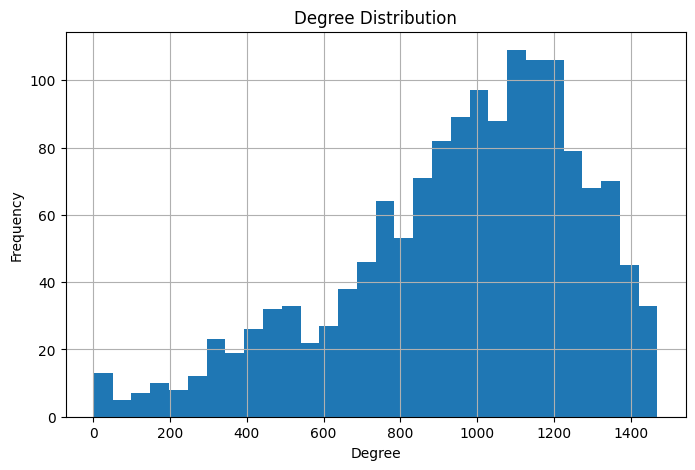

Top 5 nodes by degree:
Node 1: 1470
Node 5: 1461
Node 163: 1459
Node 218: 1456
Node 17: 1455


In [ ]:
# Degree
degrees = dict(G.degree())
plt.figure(figsize=(8, 5))
plt.hist(degrees.values(), bins=30)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Top 5 by degree
print("Top 5 nodes by degree:")
for node, val in sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val}")


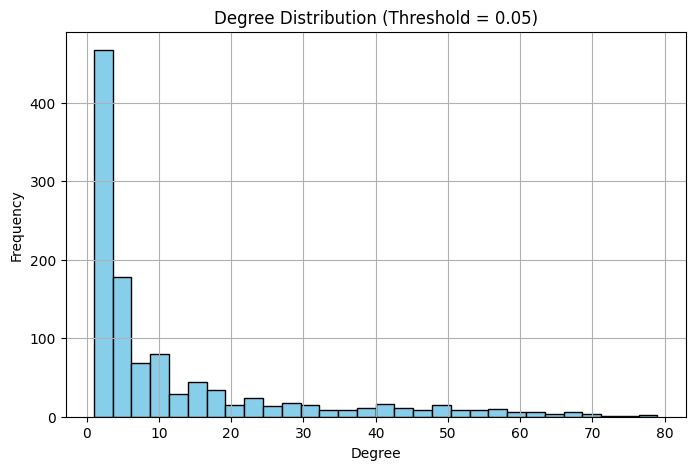

Top 5 nodes by degree:
Node 830: 79
Node 1453: 79
Node 1341: 74
Node 9: 72
Node 137: 71


In [107]:
# Degree distribution analysis after applying the weight threshold of 0.05

# Compute the degree of each node in the filtered graph
degrees = dict(G_filtered.degree())

# Plot the degree distribution (histogram)
plt.figure(figsize=(8, 5))
plt.hist(degrees.values(), bins=30, color='skyblue', edgecolor='black')
plt.title("Degree Distribution (Threshold = 0.05)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Print the top 5 nodes by degree
print("Top 5 nodes by degree:")
for node, val in sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val}")


The degree distribution without filtering shows very high degrees for most nodes, with many nodes connected to hundreds or even more than a thousand other nodes. This results from the fact that in the unfiltered network, even a very weak connection (just one shared participant) is enough to create a link between nodes.

After applying the threshold, the degree distribution changes drastically. Most nodes now have a low degree, and only a few maintain higher connectivity. This indicates that, once weak links are removed, the network becomes sparser, and the hubs (nodes with high degree) are less dominant. The filtered network better reflects the meaningful structure of the network, where connections are stronger and more reliable.

This filtering helps to avoid overestimating connectivity due to noise and allows for a clearer interpretation of the core relationships between meetup groups.

The difference is also evident when comparing the top 5 nodes by degree:

Before filtering, the top nodes had extremely high degrees, close to the maximum possible while after filtering (threshold = 0.05), the top degrees drop significantly

This confirms that, in the original network, many of the connections were due to very weak ties, which can distort the identification of key nodes. Applying the threshold allows us to highlight only the strongest and most meaningful hubs.

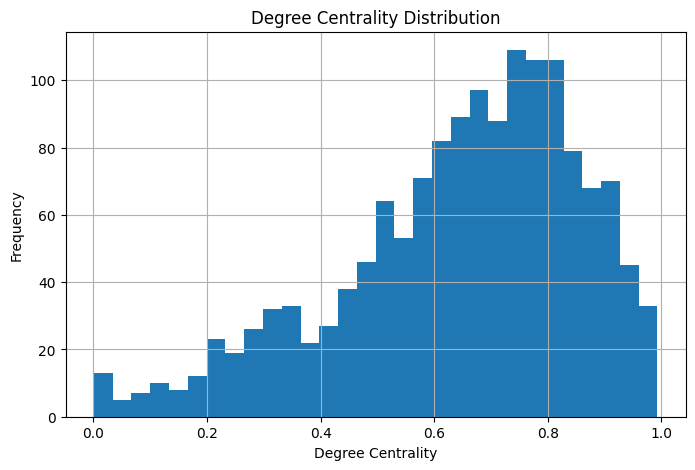

Top 5 nodes by degree centrality:
Node 1: 0.9932
Node 5: 0.9872
Node 163: 0.9858
Node 218: 0.9838
Node 17: 0.9831


In [ ]:
deg_centrality = nx.degree_centrality(G)
plt.figure(figsize=(8, 5))
plt.hist(deg_centrality.values(), bins=30)
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Top 5 nodes by degree centrality:")
for node, val in sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val:.4f}")

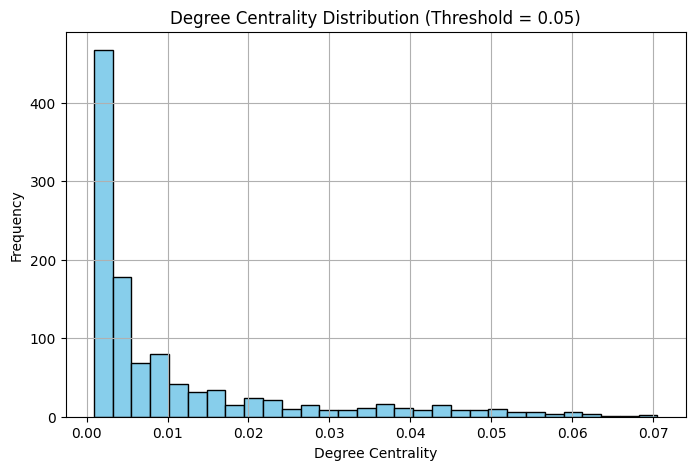

Top 5 nodes by degree centrality:
Node 830: 0.0705
Node 1453: 0.0705
Node 1341: 0.0661
Node 9: 0.0643
Node 137: 0.0634


In [85]:
# Degree centrality distribution analysis after filtering the graph (threshold = 0.05)

# Calculate degree centrality
deg_centrality = nx.degree_centrality(G_filtered)

# Plot the degree centrality distribution
plt.figure(figsize=(8, 5))
plt.hist(deg_centrality.values(), bins=30, color='skyblue', edgecolor='black')
plt.title("Degree Centrality Distribution (Threshold = 0.05)")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Print the top 5 nodes by degree centrality
print("Top 5 nodes by degree centrality:")
for node, val in sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val:.4f}")


After applying the threshold of 0.05, the distribution changes significantly: most nodes now have very low centrality values, and only a few remain with higher centrality.

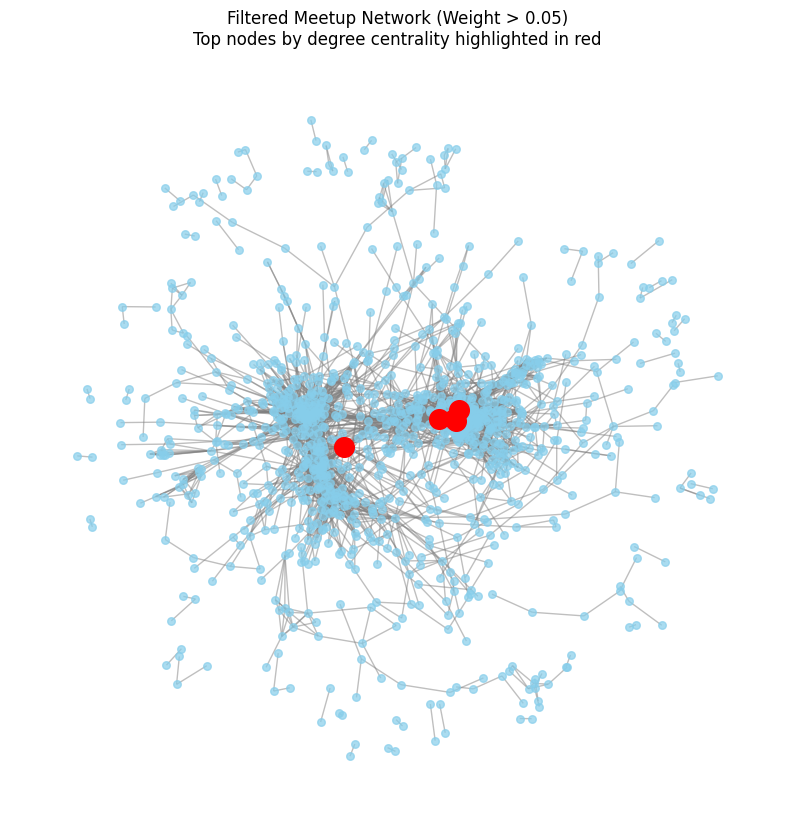

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

# Threshold e subgraph
weight_threshold = 0.05
G_filtered = nx.Graph(
    (u, v, d) for u, v, d in G.edges(data=True) if d["weight"] > weight_threshold
)

# Degree calculation
weighted_degree = dict(G_filtered.degree(weight="weight"))
top_nodes = sorted(weighted_degree, key=weighted_degree.get, reverse=True)[:10]

# Prepare node sizes and colors
node_sizes = [150 if node in top_nodes else 30 for node in G_filtered.nodes()]
node_colors = ['red' if node in top_nodes else 'skyblue' for node in G_filtered.nodes()]

# Plot
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_filtered, seed=42)

nx.draw_networkx_nodes(G_filtered, pos,
                       node_color='skyblue',
                       node_size=30,
                       alpha=0.7)

nx.draw_networkx_nodes(G_filtered, pos,
                       nodelist=important_in_filtered,
                       node_color='red',
                       node_size=200,
                       alpha=1)

nx.draw_networkx_edges(G_filtered, pos, edge_color='gray', alpha=0.5)

plt.title(f"Filtered Meetup Network (Weight > {weight_threshold})\nTop nodes by degree centrality highlighted in red")
plt.axis('off')
plt.show()




### Closeness

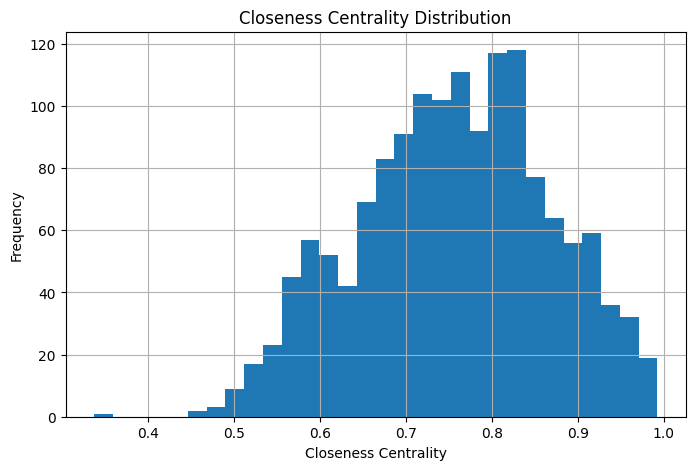

Top 5 nodes by closeness centrality:
Node 1: 0.9926
Node 5: 0.9867
Node 163: 0.9860
Node 218: 0.9834
Node 1099: 0.9834


In [ ]:
closeness = nx.closeness_centrality(G)
plt.figure(figsize=(8, 5))
plt.hist(closeness.values(), bins=30)
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Top 5 nodes by closeness centrality:")
for node, val in sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val:.4f}")

We observe that several nodes exhibit high closeness values, indicating the presence of well-integrated events that facilitate fast information flow within the meetup network.

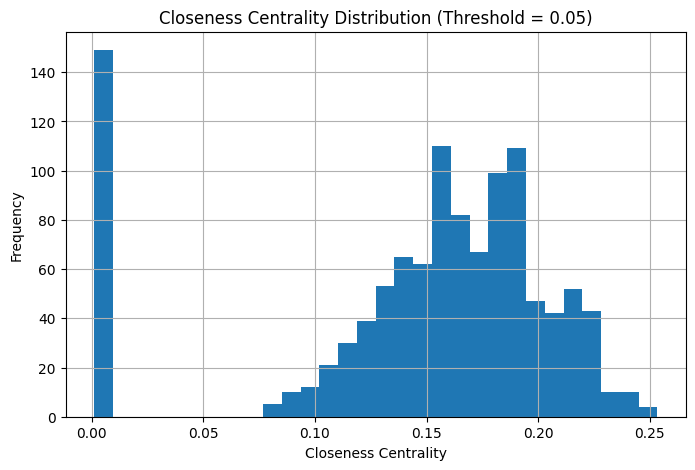

Top 5 nodes by closeness centrality (Filtered Graph):
Node 33: 0.2535
Node 105: 0.2508
Node 596: 0.2499
Node 28: 0.2479
Node 109: 0.2427


In [92]:
# Closeness centrality analysis on the filtered graph (threshold = 0.05)

closeness = nx.closeness_centrality(G_filtered)

# Plotting the closeness centrality distribution
plt.figure(figsize=(8, 5))
plt.hist(closeness.values(), bins=30)
plt.title("Closeness Centrality Distribution (Threshold = 0.05)")
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Top 5 nodes by closeness centrality
print("Top 5 nodes by closeness centrality (Filtered Graph):")
for node, val in sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val:.4f}")


After applying the threshold (0.05), the plot shows a much lower range of closeness centrality values. This suggests that only a smaller core of nodes remains well-connected, while many other nodes become peripheral or disconnected. The filtering helps to reveal the real structure of the network, reducing the artificial inflation of centrality caused by very weak links.

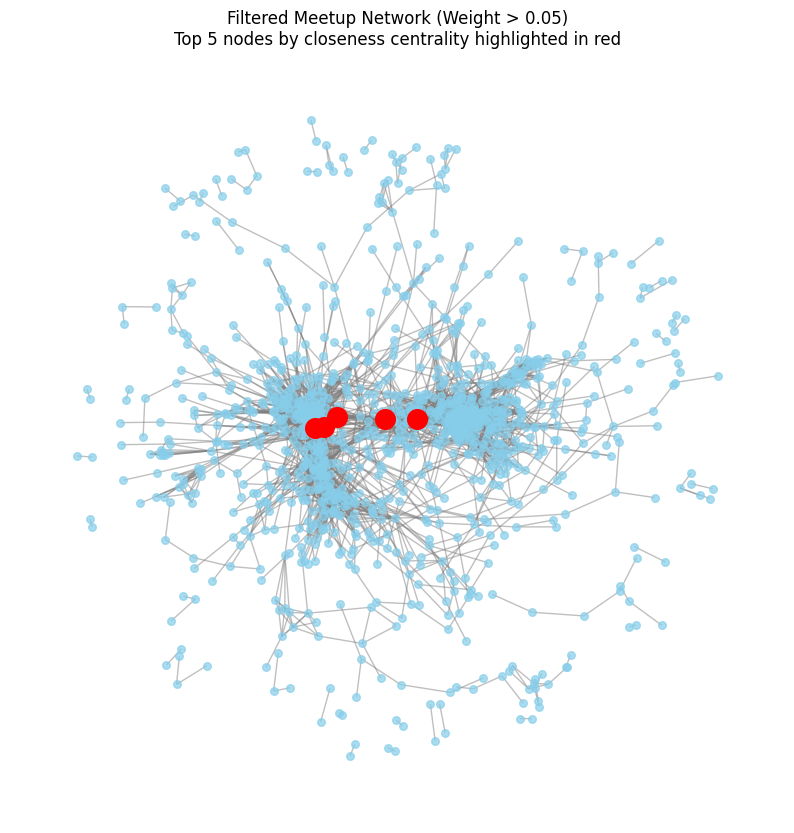

In [96]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the weight threshold and filter the graph
weight_threshold = 0.05
G_filtered = nx.Graph(
    (u, v, d) for u, v, d in G.edges(data=True) if d["weight"] > weight_threshold
)

# Compute closeness centrality for each node
closeness_centrality = nx.closeness_centrality(G_filtered)

# Select top 5 nodes with highest closeness centrality
top_closeness_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]

# Prepare node sizes and colors for the plot
node_sizes = [200 if node in top_closeness_nodes else 30 for node in G_filtered.nodes()]
node_colors = ['red' if node in top_closeness_nodes else 'skyblue' for node in G_filtered.nodes()]

# Compute the layout for the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_filtered, seed=42)

# First draw all nodes (background)
nx.draw_networkx_nodes(G_filtered, pos,
                       node_color='skyblue',
                       node_size=30,
                       alpha=0.7)

# Then draw the top nodes (foreground) to make sure they are visible
nx.draw_networkx_nodes(G_filtered, pos,
                       nodelist=top_closeness_nodes,
                       node_color='red',
                       node_size=200,
                       alpha=1)

# Draw the edges
nx.draw_networkx_edges(G_filtered, pos, edge_color='gray', alpha=0.5)

plt.title(f"Filtered Meetup Network (Weight > {weight_threshold})\nTop 5 nodes by closeness centrality highlighted in red")
plt.axis('off')
plt.show()


### Betweeness

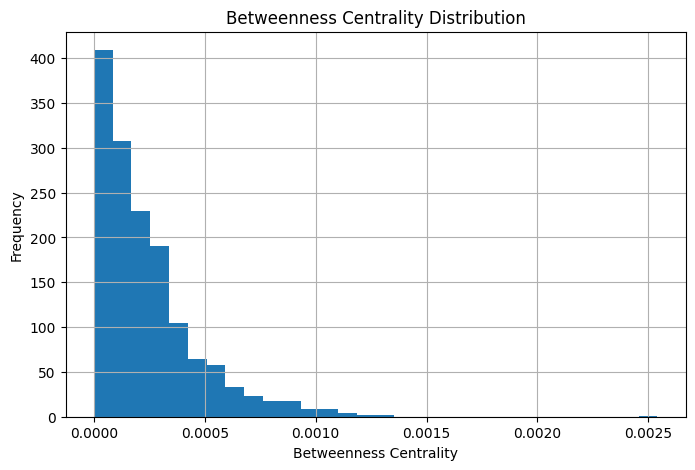

Top 5 nodes by betweenness centrality:
Node 1029: 0.0025
Node 355: 0.0014
Node 1: 0.0013
Node 5: 0.0013
Node 163: 0.0012


In [ ]:
betweenness = nx.betweenness_centrality(G)
plt.figure(figsize=(8, 5))
plt.hist(betweenness.values(), bins=30)
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Top 5 nodes by betweenness centrality:")
for node, val in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val:.4f}")


The plot shows the betweenness centrality distribution for the full network, where almost all nodes have very low values. This reflects the high density of the unfiltered network, where many nodes are directly connected, reducing the need for intermediaries.

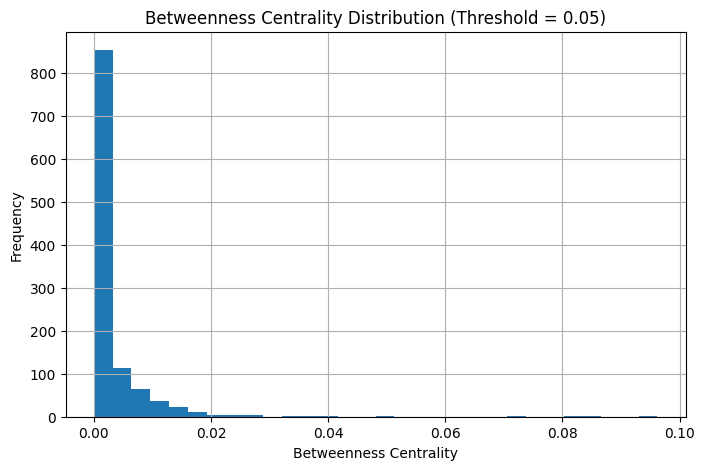

Top 5 nodes by betweenness centrality (Filtered Graph):
Node 28: 0.0962
Node 596: 0.0843
Node 546: 0.0803
Node 105: 0.0734
Node 90: 0.0500


In [93]:
# Betweenness centrality analysis on the filtered graph (threshold = 0.05)

betweenness = nx.betweenness_centrality(G_filtered)

# Plotting the betweenness centrality distribution
plt.figure(figsize=(8, 5))
plt.hist(betweenness.values(), bins=30)
plt.title("Betweenness Centrality Distribution (Threshold = 0.05)")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Top 5 nodes by betweenness centrality
print("Top 5 nodes by betweenness centrality (Filtered Graph):")
for node, val in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val:.4f}")


After applying the threshold (0.05), the second plot reveals a wider range of betweenness values. This highlights the presence of some key nodes that act as bridges between different parts of the network, which were hidden in the dense, unfiltered version.

Original graph: 1481 nodes, 708163 edges
Filtered graph: 1121 nodes, 6728 edges


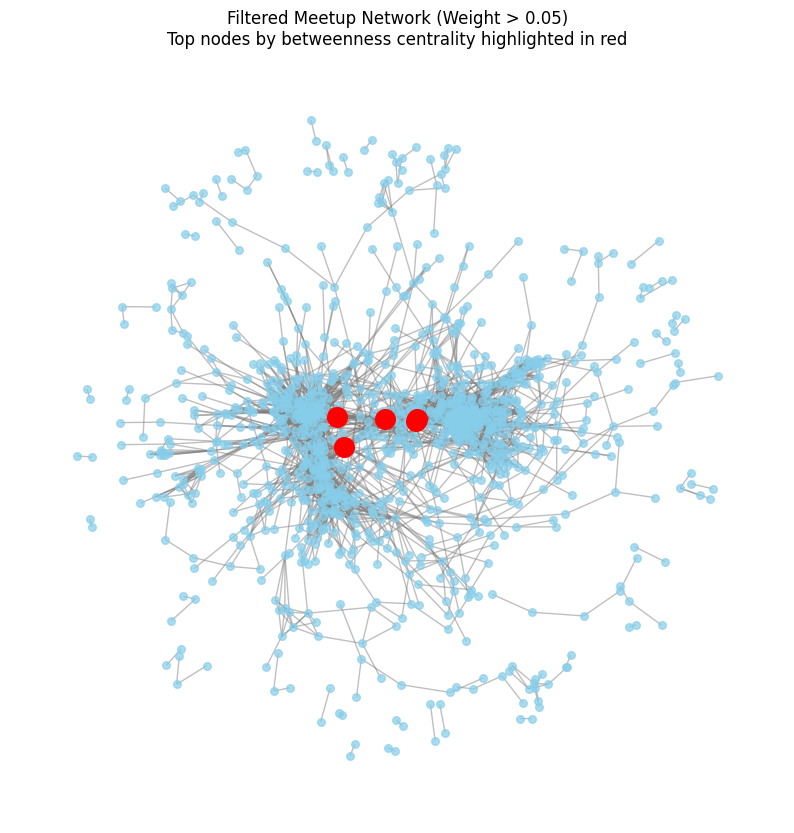

In [97]:
import networkx as nx
import matplotlib.pyplot as plt

# Define weight threshold and filter the graph
weight_threshold = 0.05
G_filtered = nx.Graph(
    (u, v, d) for u, v, d in G.edges(data=True) if d["weight"] > weight_threshold
)

print(f"Original graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Filtered graph: {G_filtered.number_of_nodes()} nodes, {G_filtered.number_of_edges()} edges")

# Compute betweenness centrality for the filtered graph
betweenness = nx.betweenness_centrality(G_filtered, weight="weight")

# Identify top 5 nodes by betweenness centrality
top_betweenness_nodes = sorted(betweenness, key=betweenness.get, reverse=True)[:5]

# Prepare node sizes and colors
node_sizes = [150 if node in top_betweenness_nodes else 30 for node in G_filtered.nodes()]
node_colors = ['red' if node in top_betweenness_nodes else 'skyblue' for node in G_filtered.nodes()]

# Plot the filtered network with highlighted nodes
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_filtered, seed=42)

# Draw regular nodes
nx.draw_networkx_nodes(G_filtered, pos,
                       node_color='skyblue',
                       node_size=30,
                       alpha=0.7)

# Draw top betweenness nodes on top
nx.draw_networkx_nodes(G_filtered, pos,
                       nodelist=top_betweenness_nodes,
                       node_color='red',
                       node_size=200,
                       alpha=1)

# Draw edges
nx.draw_networkx_edges(G_filtered, pos, edge_color='gray', alpha=0.5)

plt.title(f"Filtered Meetup Network (Weight > {weight_threshold})\nTop nodes by betweenness centrality highlighted in red")
plt.axis('off')
plt.show()


### Eigenvector

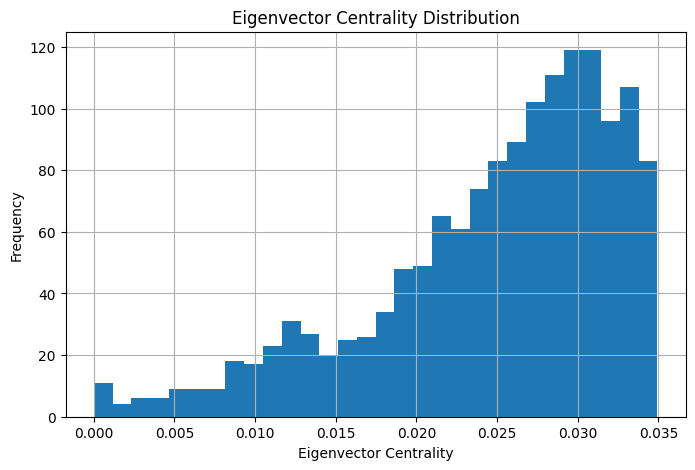

Top 5 nodes by eigenvector centrality:
Node 1: 0.0349
Node 163: 0.0349
Node 5: 0.0349
Node 1099: 0.0349
Node 105: 0.0349


In [ ]:
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
plt.figure(figsize=(8, 5))
plt.hist(eigenvector.values(), bins=30)
plt.title("Eigenvector Centrality Distribution")
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Top 5 nodes by eigenvector centrality:")
for node, val in sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val:.4f}")


Without filtering, the distribution is  spread, suggesting that many nodes appear to have relatively high influence just because of the high density of the network.

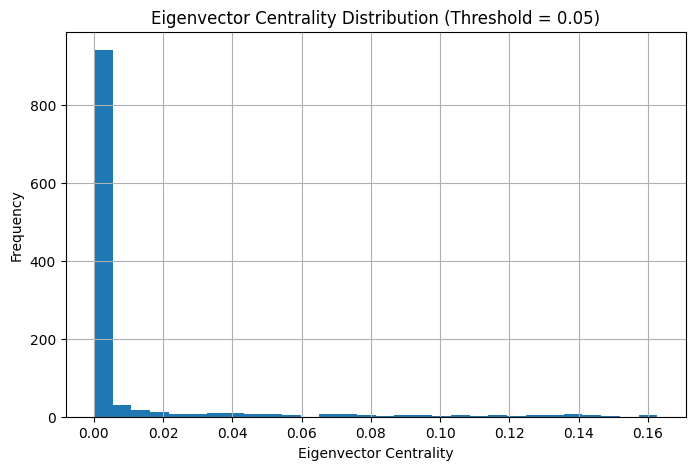

Top 5 nodes by eigenvector centrality (Filtered Graph):
Node 1453: 0.1628
Node 1341: 0.1613
Node 9: 0.1607
Node 830: 0.1604
Node 166: 0.1579


In [98]:
# Eigenvector centrality analysis on the filtered graph (threshold = 0.05)

eigenvector = nx.eigenvector_centrality(G_filtered, max_iter=1000)

# Plotting the eigenvector centrality distribution
plt.figure(figsize=(8, 5))
plt.hist(eigenvector.values(), bins=30)
plt.title("Eigenvector Centrality Distribution (Threshold = 0.05)")
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Top 5 nodes by eigenvector centrality
print("Top 5 nodes by eigenvector centrality (Filtered Graph):")
for node, val in sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val:.4f}")


After applying the threshold, most nodes show very low eigenvector centrality, with only a few standing out as truly central.


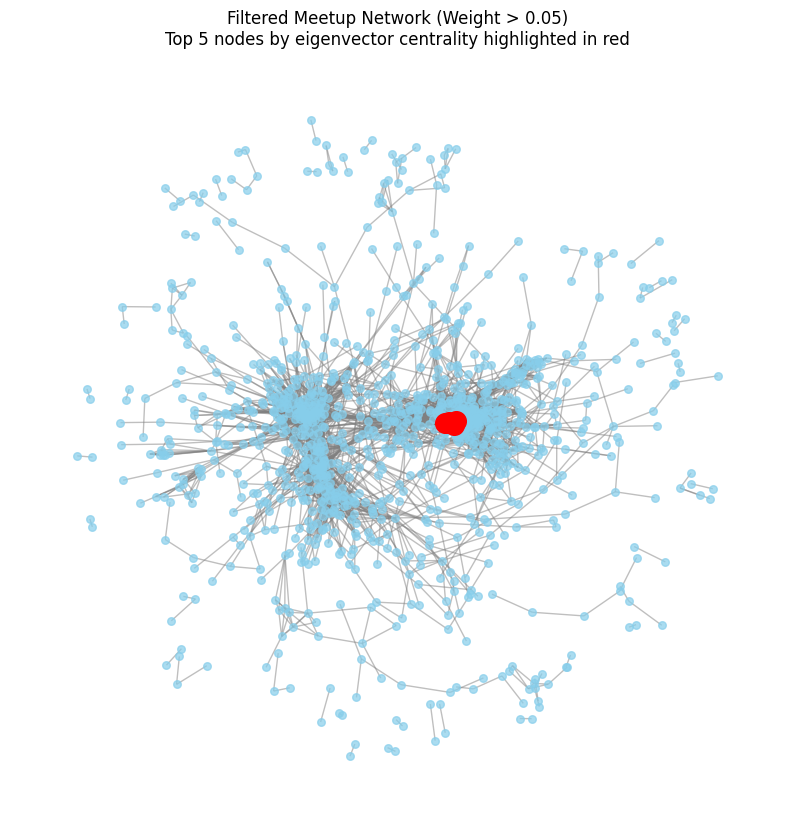

In [99]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the weight threshold and filter the graph
weight_threshold = 0.05
G_filtered = nx.Graph(
    (u, v, d) for u, v, d in G.edges(data=True) if d["weight"] > weight_threshold
)

# Compute eigenvector centrality for each node
eigenvector_centrality = nx.eigenvector_centrality(G_filtered, weight="weight", max_iter=1000)

# Choose the number of top nodes to highlight (adjust this if needed)
top_n = 5  # Change to 10 or another value if you want more!
top_eigen_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:top_n]

# Prepare node sizes and colors for the plot
node_sizes = [200 if node in top_eigen_nodes else 30 for node in G_filtered.nodes()]
node_colors = ['red' if node in top_eigen_nodes else 'skyblue' for node in G_filtered.nodes()]

# Compute the layout for the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_filtered, seed=42)

# First draw all nodes (background)
nx.draw_networkx_nodes(G_filtered, pos,
                       node_color='skyblue',
                       node_size=30,
                       alpha=0.7)

# Then draw the top nodes (foreground) to make sure they are visible
nx.draw_networkx_nodes(G_filtered, pos,
                       nodelist=top_eigen_nodes,
                       node_color='red',
                       node_size=200,
                       alpha=1)

# Draw the edges
nx.draw_networkx_edges(G_filtered, pos, edge_color='gray', alpha=0.5)

plt.title(f"Filtered Meetup Network (Weight > {weight_threshold})\nTop {top_n} nodes by eigenvector centrality highlighted in red")
plt.axis('off')
plt.show()


### Pagerank

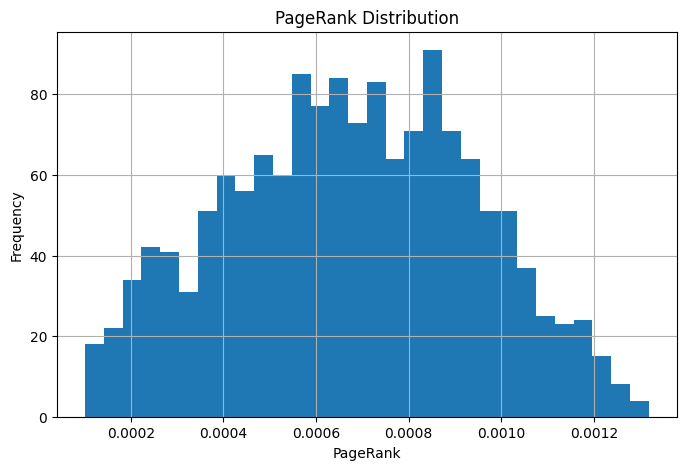

Top 5 nodes by PageRank:
Node 1453: 0.0013
Node 546: 0.0013
Node 105: 0.0013
Node 170: 0.0013
Node 775: 0.0013


In [ ]:
pagerank = nx.pagerank(G, alpha=0.85)
plt.figure(figsize=(8, 5))
plt.hist(pagerank.values(), bins=30)
plt.title("PageRank Distribution")
plt.xlabel("PageRank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Top 5 nodes by PageRank:")
for node, val in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val:.4f}")


The PageRank distribution without filtering shows a more uniform spread of values across nodes, making it harder to identify truly central nodes

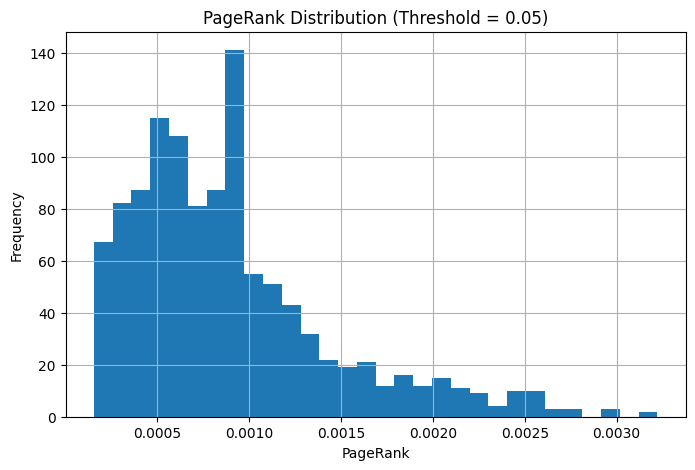

Top 5 nodes by PageRank (Filtered Graph):
Node 218: 0.0032
Node 62: 0.0032
Node 217: 0.0030
Node 33: 0.0030
Node 163: 0.0029


In [100]:
# PageRank analysis on the filtered graph (threshold = 0.05)

pagerank = nx.pagerank(G_filtered, alpha=0.85)

# Plotting the PageRank distribution
plt.figure(figsize=(8, 5))
plt.hist(pagerank.values(), bins=30)
plt.title("PageRank Distribution (Threshold = 0.05)")
plt.xlabel("PageRank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Top 5 nodes by PageRank
print("Top 5 nodes by PageRank (Filtered Graph):")
for node, val in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val:.4f}")


After applying the threshold (0.05), the distribution becomes more skewed, clearly highlighting nodes with higher importance.

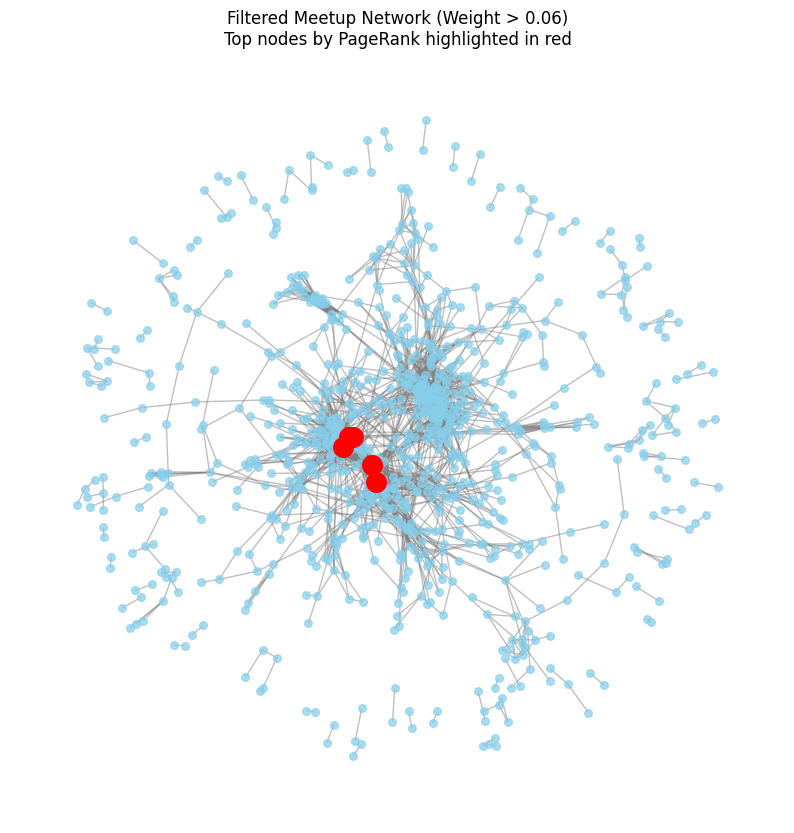

In [61]:
import networkx as nx
import matplotlib.pyplot as plt

# Compute PageRank on the filtered graph
pagerank_scores = nx.pagerank(G_filtered, weight="weight")

# Select the top 5 nodes by PageRank score
top_pagerank_nodes = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)[:5]

# Prepare node sizes and colors: highlight top PageRank nodes in red
node_sizes = [150 if node in top_pagerank_nodes else 30 for node in G_filtered.nodes()]
node_colors = ['red' if node in top_pagerank_nodes else 'skyblue' for node in G_filtered.nodes()]

# Network visualization
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_filtered, seed=42)

# Draw all nodes (non-important ones)
nx.draw_networkx_nodes(G_filtered, pos,
                       node_color='skyblue',
                       node_size=30,
                       alpha=0.7)

# Draw top PageRank nodes on top, in red and larger
nx.draw_networkx_nodes(G_filtered, pos,
                       nodelist=top_pagerank_nodes,
                       node_color='red',
                       node_size=200,
                       alpha=1)

# Draw edges
nx.draw_networkx_edges(G_filtered, pos, edge_color='gray', alpha=0.5)

plt.title(f"Filtered Meetup Network (Weight > {weight_threshold})\nTop nodes by PageRank highlighted in red")
plt.axis('off')
plt.show()


### Clustering Coefficient

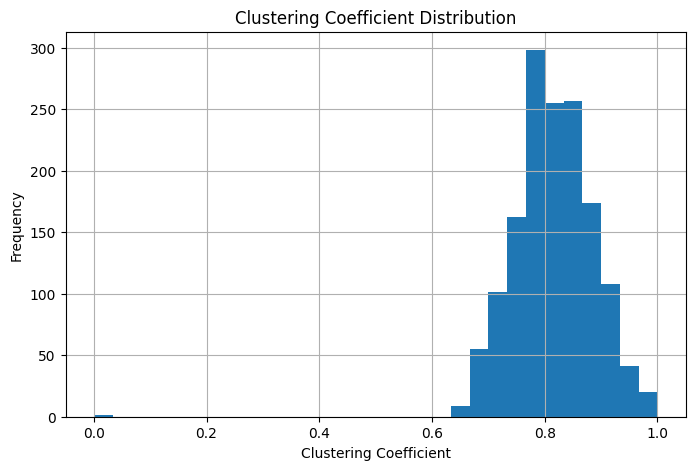

Top 5 nodes by clustering coefficient:
Node 724: 1.0000
Node 974: 1.0000
Node 1351: 1.0000
Node 1481: 1.0000
Node 1482: 1.0000


In [ ]:
clustering = nx.clustering(G)
plt.figure(figsize=(8, 5))
plt.hist(clustering.values(), bins=30)
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Top 5 nodes by clustering coefficient:")
for node, val in sorted(clustering.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val:.4f}")


Without filtering, most nodes show high clustering values, suggesting an overall dense and tightly connected network.

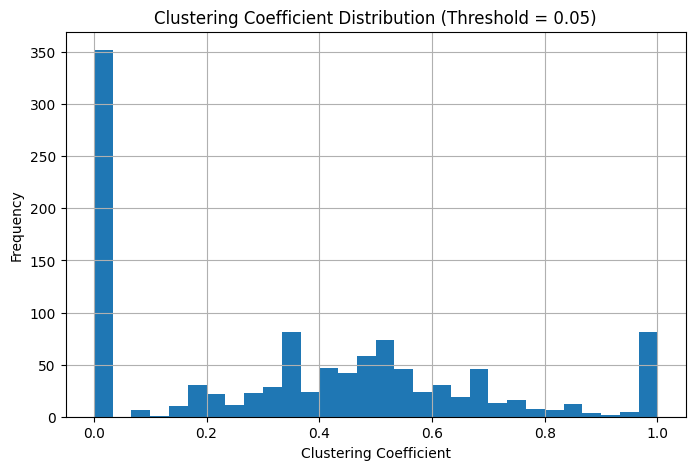

Top 5 nodes by clustering coefficient (Filtered Graph):
Node 64: 1.0000
Node 934: 1.0000
Node 316: 1.0000
Node 134: 1.0000
Node 782: 1.0000


In [101]:
# Clustering coefficient analysis on the filtered graph (threshold = 0.05)

clustering = nx.clustering(G_filtered)

# Plotting the clustering coefficient distribution
plt.figure(figsize=(8, 5))
plt.hist(clustering.values(), bins=30)
plt.title("Clustering Coefficient Distribution (Threshold = 0.05)")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Top 5 nodes by clustering coefficient
print("Top 5 nodes by clustering coefficient (Filtered Graph):")
for node, val in sorted(clustering.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {val:.4f}")


After filtering out weaker connections, the distribution becomes more varied, with many nodes showing low clustering values.
This indicates that once the noise is removed, the real structure of the network is less uniformly connected, revealing more sparse and meaningful patterns of local connectivit

In [ ]:
newman_clustering = nx.transitivity(G)
print(f"Clustering coefficient (Newman/transitivity): {newman_clustering:.4f}")

Clustering coefficient (Newman/transitivity): 0.7830


In [102]:
import networkx as nx

# Assuming G_filtered is your filtered graph with the threshold applied
newman_clustering_filtered = nx.transitivity(G_filtered)
print(f"Clustering coefficient (Newman/transitivity) with threshold: {newman_clustering_filtered:.4f}")


Clustering coefficient (Newman/transitivity) with threshold: 0.4928


The clustering coefficient (Newman/transitivity) drops from 0.7830 in the original network to 0.4928 after applying the edge weight threshold of 0.05.
This decrease confirms that much of the initial high clustering was driven by very weak connections (edges with low weights).
After filtering out these weaker links, the remaining network shows fewer closed triangles, reflecting a more realistic view of tightly connected groups.
The result suggests that without filtering, the network may overestimate the level of local cohesion due to noisy, insignificant links.

Original graph: 1481 nodes, 708163 edges
Filtered graph: 1121 nodes, 6728 edges


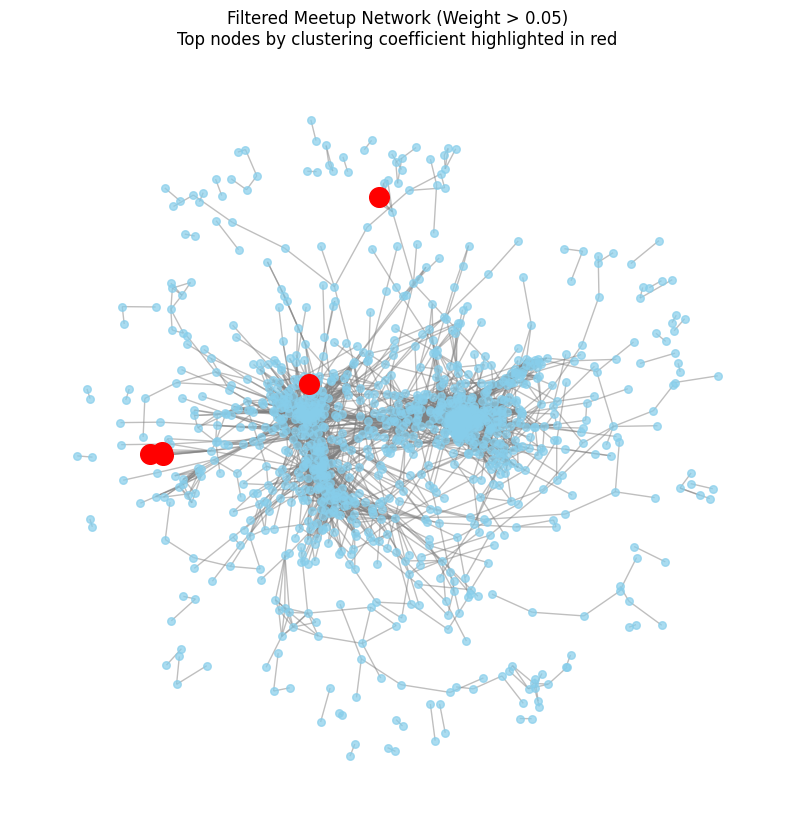

In [76]:
import networkx as nx
import matplotlib.pyplot as plt

# Define weight threshold and filter the graph
weight_threshold = 0.05
G_filtered = nx.Graph(
    (u, v, d) for u, v, d in G.edges(data=True) if d["weight"] > weight_threshold
)

print(f"Original graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Filtered graph: {G_filtered.number_of_nodes()} nodes, {G_filtered.number_of_edges()} edges")

# Compute clustering coefficient for each node
clustering_coeff = nx.clustering(G_filtered, weight="weight")

# Identify top 5 nodes by clustering coefficient
top_clustering_nodes = sorted(clustering_coeff, key=clustering_coeff.get, reverse=True)[:5]

# Prepare node sizes and colors
node_sizes = [150 if node in top_clustering_nodes else 30 for node in G_filtered.nodes()]
node_colors = ['red' if node in top_clustering_nodes else 'skyblue' for node in G_filtered.nodes()]

# Plot the filtered network with highlighted nodes
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_filtered, seed=42)

# Draw regular nodes
nx.draw_networkx_nodes(G_filtered, pos,
                       node_color='skyblue',
                       node_size=30,
                       alpha=0.7)

# Draw top clustering coefficient nodes on top
nx.draw_networkx_nodes(G_filtered, pos,
                       nodelist=top_clustering_nodes,
                       node_color='red',
                       node_size=200,
                       alpha=1)

# Draw edges
nx.draw_networkx_edges(G_filtered, pos, edge_color='gray', alpha=0.5)

plt.title(f"Filtered Meetup Network (Weight > {weight_threshold})\nTop nodes by clustering coefficient highlighted in red")
plt.axis('off')
plt.show()


The top nodes by clustering coefficient are not located at the center of the network, but rather in the periphery. This is expected, as the clustering coefficient measures how well the neighbors of a node are connected to each other, not how many connections the node has. Therefore, nodes with high clustering often belong to small, tightly connected groups, even if they have a low degree or are not globally central in the network

## Macroscale analysis

In [ ]:
# Largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc).copy()
print(f"Largest connected component size: {len(G_lcc)}")

# Average shortest path (within LCC)
avg_path_len = nx.average_shortest_path_length(G_lcc)
print(f"Average shortest path length (LCC): {avg_path_len:.4f}")

# Diameter (within LCC)
diameter = nx.diameter(G_lcc)
print(f"Network diameter (LCC): {diameter}")

# Average clustering coefficient
clustering_coeff = nx.average_clustering(G)
print(f"Average clustering coefficient: {clustering_coeff:.4f}")

# Degree centrality: top 5 nodes
centrality = nx.degree_centrality(G)
top_5 = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality:")
for node, cent in top_5:
    print(f"Node {node}: {cent:.4f}")


Largest connected component size: 1481
Average shortest path length (LCC): 1.3559
Network diameter (LCC): 4
Average clustering coefficient: 0.8166
Top 5 nodes by degree centrality:
Node 1: 0.9932
Node 5: 0.9872
Node 163: 0.9858
Node 218: 0.9838
Node 17: 0.9831


In [103]:
import networkx as nx

# Largest connected component
largest_cc = max(nx.connected_components(G_filtered), key=len)
G_lcc = G_filtered.subgraph(largest_cc).copy()
print(f"Largest connected component size (filtered): {len(G_lcc)}")

# Average shortest path (within LCC)
avg_path_len = nx.average_shortest_path_length(G_lcc)
print(f"Average shortest path length (LCC, filtered): {avg_path_len:.4f}")

# Diameter (within LCC)
diameter = nx.diameter(G_lcc)
print(f"Network diameter (LCC, filtered): {diameter}")

# Average clustering coefficient (filtered graph)
clustering_coeff = nx.average_clustering(G_filtered)
print(f"Average clustering coefficient (filtered): {clustering_coeff:.4f}")

# Degree centrality: top 5 nodes (filtered graph)
centrality = nx.degree_centrality(G_filtered)
top_5 = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality (filtered):")
for node, cent in top_5:
    print(f"Node {node}: {cent:.4f}")


Largest connected component size (filtered): 972
Average shortest path length (LCC, filtered): 5.3907
Network diameter (LCC, filtered): 16
Average clustering coefficient (filtered): 0.3600
Top 5 nodes by degree centrality (filtered):
Node 830: 0.0705
Node 1453: 0.0705
Node 1341: 0.0661
Node 9: 0.0643
Node 137: 0.0634


Before applying the edge weight threshold, the network appeared almost fully connected, with a single giant component including all 1481 nodes, a very short average path length (1.36), and a small diameter (4). The high clustering coefficient (0.82) suggested an extremely dense and cohesive structure, but this was mostly due to the presence of many weak links.

After filtering with a threshold of 0.05, the network becomes less dense and more realistic:

The largest connected component is reduced to 972 nodes,

The average shortest path length increases to 5.39,

The diameter expands to 16,

The average clustering coefficient drops to 0.36, indicating fewer tightly connected triangles.

This change reflects the removal of weak connections that were artificially inflating the sense of connectivity and clustering. The filtered network highlights the core structure of meaningful relationships, giving a clearer and more interpretable view of the true topology.

The ranking of the top 5 nodes by degree centrality also changes significantly, showing that the most "important" nodes in the full graph were often connected through many weak links, while the filtered analysis identifies those truly central based on stronger connections.

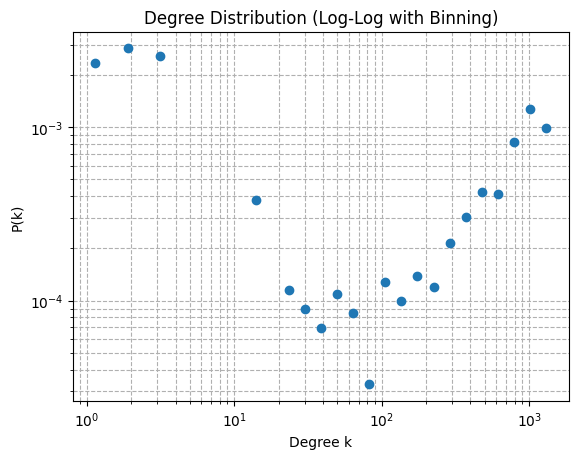

In [ ]:
import numpy as np
# Get degrees
degree_sequence = [d for n, d in G.degree()]
max_degree = max(degree_sequence)

# Create logarithmic bins
bins = np.logspace(np.log10(1), np.log10(max_degree), num=30)
hist, bin_edges = np.histogram(degree_sequence, bins=bins, density=True)

# Bin centers for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Log-log plot
plt.loglog(bin_centers, hist, marker='o', linestyle='None')
plt.title("Degree Distribution (Log-Log with Binning)")
plt.xlabel("Degree k")
plt.ylabel("P(k)")
plt.grid(True, which="both", ls="--")
plt.show()

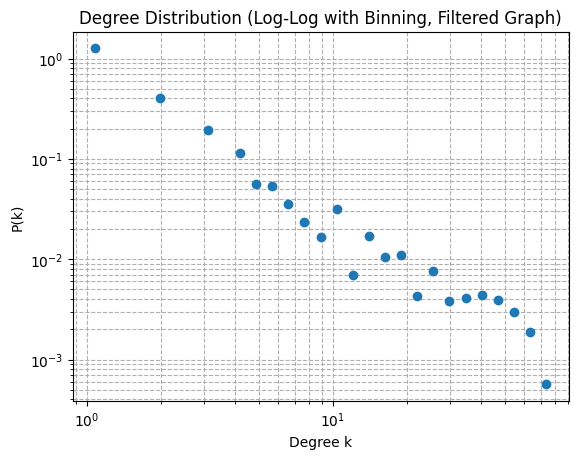

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the degree sequence from the filtered graph
degree_sequence_filtered = [d for n, d in G_filtered.degree()]
max_degree_filtered = max(degree_sequence_filtered)

# Create logarithmic bins
bins_filtered = np.logspace(np.log10(1), np.log10(max_degree_filtered), num=30)
hist_filtered, bin_edges_filtered = np.histogram(degree_sequence_filtered, bins=bins_filtered, density=True)

# Bin centers for plotting
bin_centers_filtered = (bin_edges_filtered[:-1] + bin_edges_filtered[1:]) / 2

# Log-log plot
plt.loglog(bin_centers_filtered, hist_filtered, marker='o', linestyle='None')
plt.title("Degree Distribution (Log-Log with Binning, Filtered Graph)")
plt.xlabel("Degree k")
plt.ylabel("P(k)")
plt.grid(True, which="both", ls="--")
plt.show()


The first plot (original graph) shows an irregular degree distribution with unexpected behavior at higher degrees, possibly due to the presence of many weak connections between nodes (even a single shared participant creates a link).

After applying the edge weight threshold (second plot), the filtered graph shows a clearer heavy-tailed distribution. This indicates that a small number of nodes act as hubs with many connections, while most nodes have low degrees. Filtering out weak links helps reveal the true structure of the network, making the degree distribution more interpretable and reducing noise caused by spurious connections.

In [ ]:
from networkx.generators.random_graphs import random_regular_graph

# Compare clustering and path with Erdős–Rényi or WS model (same n, p)
n, p = G.number_of_nodes(), nx.density(G)
G_rand = nx.erdos_renyi_graph(n=n, p=p)
clust_rand = nx.average_clustering(G_rand)
try:
    path_rand = nx.average_shortest_path_length(max(nx.connected_components(G_rand), key=len))
except:
    path_rand = float('inf')

print(f"Random graph clustering: {clust_rand:.4f}")
print(f"Random graph avg path length: {path_rand:.4f}")
print("Small-world property likely present!" if clustering_coeff > clust_rand and avg_path_len < path_rand else "Small-world property unclear.")


Random graph clustering: 0.6463
Random graph avg path length: inf
Small-world property likely present!


In [105]:
from networkx.generators.random_graphs import erdos_renyi_graph

# Use filtered graph G_filtered
n_filtered = G_filtered.number_of_nodes()
p_filtered = nx.density(G_filtered)

# Generate Erdős–Rényi random graph with same number of nodes and edge probability
G_rand = erdos_renyi_graph(n=n_filtered, p=p_filtered)

# Compute clustering coefficient and average shortest path for the random graph
clust_rand = nx.average_clustering(G_rand)

try:
    # Use the largest connected component of the random graph for path length
    largest_cc_rand = max(nx.connected_components(G_rand), key=len)
    G_lcc_rand = G_rand.subgraph(largest_cc_rand).copy()
    path_rand = nx.average_shortest_path_length(G_lcc_rand)
except:
    path_rand = float('inf')

# Compute clustering coefficient and avg path length for your filtered graph
clustering_coeff_filtered = nx.average_clustering(G_filtered)

largest_cc_filtered = max(nx.connected_components(G_filtered), key=len)
G_lcc_filtered = G_filtered.subgraph(largest_cc_filtered).copy()
avg_path_len_filtered = nx.average_shortest_path_length(G_lcc_filtered)

# Print the results
print(f"Filtered graph clustering: {clustering_coeff_filtered:.4f}")
print(f"Filtered graph avg path length: {avg_path_len_filtered:.4f}")
print(f"Random graph clustering: {clust_rand:.4f}")
print(f"Random graph avg path length: {path_rand:.4f}")

# Small-world property check
if clustering_coeff_filtered > clust_rand and avg_path_len_filtered < path_rand:
    print("Small-world property likely present!")
else:
    print("Small-world property unclear.")


Filtered graph clustering: 0.3600
Filtered graph avg path length: 5.3907
Random graph clustering: 0.0114
Random graph avg path length: 3.0895
Small-world property unclear.


In the original (unfiltered) network, the clustering coefficient is very high (0.6463), and the random graph for comparison is disconnected (infinite average path length). This suggests an artificially high connectivity, mainly caused by many weak links, making the network appear to have a small-world structure.

After applying the edge weight threshold, the clustering coefficient drops to 0.3600, and the average shortest path length becomes 5.39. In this filtered version, the random graph has much lower clustering (0.0114) and a reasonable path length (3.09).

This means that after filtering, the small-world property is no longer clearly evident. The filtering removes noisy connections, providing a more realistic view of the network, where the apparent small-world behavior seen before was likely an artifact of the dense, unfiltered graph.

In [ ]:
assortativity = nx.degree_assortativity_coefficient(G)
print(f"Assortativity coefficient: {assortativity:.4f}")

Assortativity coefficient: -0.1506


In [109]:
assortativity = nx.degree_assortativity_coefficient(G_filtered)
print(f"Assortativity coefficient (filtered): {assortativity:.4f}")

Assortativity coefficient (filtered): 0.5297


Before filtering, the assortativity coefficient is -0.1506, indicating disassortative mixing: highly connected nodes tend to link with low-degree nodes. This behavior may be driven by the many weak connections in the original network, where even a single shared participant creates a link between meetups.

After applying the threshold, the assortativity coefficient increases to 0.5297, suggesting positive assortativity: nodes now tend to connect with others of similar degree. Filtering out weak links removes noisy connections and highlights stronger, more meaningful relationships between meetups of similar popularity.